In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
import matplotlib.pyplot as plt

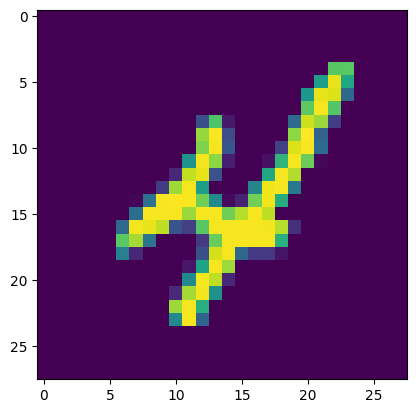

In [9]:
plt.imshow(X_train[9])

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
model = Sequential()

In [14]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation = 'softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import tensorflow
from tensorflow import keras
from tensorflow.keras 

In [17]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8594 - loss: 0.4924 - val_accuracy: 0.9527 - val_loss: 0.1623
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9611 - loss: 0.1269 - val_accuracy: 0.9667 - val_loss: 0.1172
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9758 - loss: 0.0804 - val_accuracy: 0.9703 - val_loss: 0.0974
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9822 - loss: 0.0576 - val_accuracy: 0.9709 - val_loss: 0.0934
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9858 - loss: 0.0445 - val_accuracy: 0.9697 - val_loss: 0.1049
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9888 - loss: 0.0332 - val_accuracy: 0.9730 - val_loss: 0.0960
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9920 - loss: 0.0262 - val_accuracy: 0.9748 - val_loss: 0.0975
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9928 - loss: 0.0212 - 

In [18]:
history.history

{'accuracy': [0.9179375171661377,
  0.9633125066757202,
  0.9748333096504211,
  0.9815208315849304,
  0.9841458201408386,
  0.987666666507721,
  0.9904583096504211,
  0.9915000200271606,
  0.9931250214576721,
  0.9937083125114441,
  0.9950000047683716,
  0.9944375157356262,
  0.9956666827201843,
  0.9962291717529297,
  0.9961041808128357,
  0.995229184627533,
  0.9968958497047424,
  0.9971250295639038,
  0.9959375262260437,
  0.996666669845581],
 'loss': [0.2842128574848175,
  0.11987193673849106,
  0.08254662901163101,
  0.06001715734601021,
  0.04856881871819496,
  0.03726933151483536,
  0.029202738776803017,
  0.026010360568761826,
  0.02259700745344162,
  0.019590230658650398,
  0.016028398647904396,
  0.015374541282653809,
  0.013411635532975197,
  0.011745812371373177,
  0.011422703042626381,
  0.014554457738995552,
  0.008587464690208435,
  0.008241021074354649,
  0.011460435576736927,
  0.009927072562277317],
 'val_accuracy': [0.9526666402816772,
  0.9666666388511658,
  0.97033

In [19]:
model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[3.2103142e-18, 4.9347479e-12, 2.2407013e-12, ..., 9.9999994e-01,
        1.4015578e-17, 1.2629603e-13],
       [7.6067102e-28, 9.5553567e-13, 9.9999994e-01, ..., 1.6963100e-27,
        8.4077849e-11, 5.2263701e-30],
       [1.8786750e-16, 9.9999779e-01, 4.2302498e-10, ..., 2.1579647e-06,
        2.3554317e-10, 1.5493343e-16],
       ...,
       [8.9965129e-25, 3.8030308e-11, 6.2590922e-20, ..., 5.2268368e-12,
        2.4322133e-11, 1.4486386e-08],
       [7.0142165e-26, 8.3738422e-18, 9.9349903e-29, ..., 3.3615594e-17,
        3.0820080e-12, 1.3158695e-23],
       [2.5510520e-12, 8.8076550e-22, 1.0860693e-23, ..., 6.6791739e-30,
        1.4614256e-17, 1.0976468e-18]], dtype=float32)

In [20]:
y_prob=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [21]:
y_prob

array([[3.2103142e-18, 4.9347479e-12, 2.2407013e-12, ..., 9.9999994e-01,
        1.4015578e-17, 1.2629603e-13],
       [7.6067102e-28, 9.5553567e-13, 9.9999994e-01, ..., 1.6963100e-27,
        8.4077849e-11, 5.2263701e-30],
       [1.8786750e-16, 9.9999779e-01, 4.2302498e-10, ..., 2.1579647e-06,
        2.3554317e-10, 1.5493343e-16],
       ...,
       [8.9965129e-25, 3.8030308e-11, 6.2590922e-20, ..., 5.2268368e-12,
        2.4322133e-11, 1.4486386e-08],
       [7.0142165e-26, 8.3738422e-18, 9.9349903e-29, ..., 3.3615594e-17,
        3.0820080e-12, 1.3158695e-23],
       [2.5510520e-12, 8.8076550e-22, 1.0860693e-23, ..., 6.6791739e-30,
        1.4614256e-17, 1.0976468e-18]], dtype=float32)

In [22]:
y_pred = y_prob.argmax(axis=1)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9732

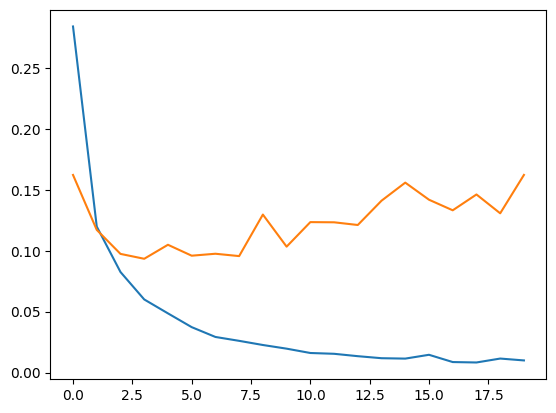

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

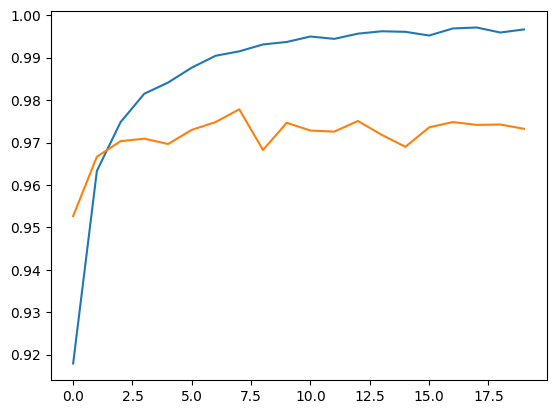

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [26]:
X_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [27]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

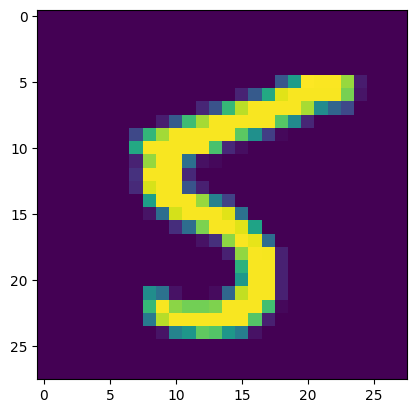

In [28]:
plt.imshow(X_test[127])

In [29]:
model.predict(X_test[127].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([5])

---------------------------------Done!----------------------------------